In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import joblib
import gc

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MiniBatchKMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors, kneighbors_graph, KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest



In [121]:
file_name = 'data/df_featured.csv'
df = pd.read_csv(file_name)

In [122]:
df

Intensity  Original_cloud_index    lateral       axial  vertical  \
0               4                     2 -44.925005   90.213491  0.654076   
1               4                     2 -44.915330   90.209737  0.647520   
2               6                     2 -44.909792   90.197784  0.509847   
3               3                     2 -44.898397   90.222283  0.653840   
4               8                     2 -44.890612   90.183980  0.516509   
...           ...                   ...        ...         ...       ...   
313964          6                     4  30.973284   96.587697  0.208996   
313965         18                     4  31.022470  100.096818  0.437129   
313966         22                     4  30.930926   98.097618  0.395188   
313967          8                     4  30.958951   98.254230  0.320579   
313968          7                     4  30.943109   97.977302  0.357562   

        lateral_inch   axial_inch  vertical_inch  lateral_inch_round  \
0        -539.100056  1082.561896       7.848909           -539.1250   
1        -538.983963  1082.516840       7.770240           -539.0000   
2        -538.917506  1082.373414       6.118159           -538.9375   
3        -538.780763  1082.667401       7.846079           -538.7500   
4        -538.687348  1082.207759       6.198104           -538.6875   
...              ...          ...            ...                 ...   
313964    371.679408  1159.052360       2.507948            371.6875   
313965    372.269635  1201.161814       5.245547            372.2500   
313966    371.171107  1177.171422       4.742258            371.1875   
313967    371.507409  1179.050761       3.846949            371.5000   
313968    371.317312  1175.727619       4.290746            371.3125   

        axial_inch_round  ...        Nz       PCV  curvature  \
0              1082.5625  ...  0.073178  1.000000   0.008685   
1              1082.5000  ...  0.078299  0.988281   0.007299   
2              1082.3750  ...  0.440944  0.875000   0.071002   
3              1082.6875  ...  0.078299  1.000000   0.007299   
4              1082.1875  ...  0.551544  0.882812   0.087457   
...                  ...  ...       ...       ...        ...   
313964         1159.0625  ...  0.291229  0.707031   0.059514   
313965         1201.1875  ...  0.985293  0.964844   0.020569   
313966         1177.1875  ...  0.477676  0.910156   0.090360   
313967         1179.0625  ...  0.455725  0.734375   0.031686   
313968         1175.7500  ...  0.063031  0.835938   0.100769   

        roughness_mean_abs  roughness_rms  roughness_std        DIP  \
0                 2.222442       2.580461       1.311309  85.803443   
1                 2.266367       2.626620       1.327672  85.509212   
2                 2.319700       2.675738       1.333630  63.835900   
3                 2.279984       2.643965       1.338740  85.509212   
4                 2.200886       2.544521       1.276984  56.526974   
...                    ...            ...            ...        ...   
313964            0.424504       0.526073       0.310724  73.068448   
313965            1.207730       1.354254       0.612692   9.838688   
313966            0.818943       0.898119       0.368713  61.466282   
313967            0.373141       0.501191       0.334602  62.888400   
313968            0.390154       0.442959       0.209743  86.386198   

            DIPDIR    NORMDIP  NORMDIPDIR  
0       273.584267  85.803443  273.584267  
1       273.183489  85.509212  273.183489  
2       278.449522  63.835900  278.449522  
3       273.183489  85.509212  273.183489  
4       259.742408  56.526974  259.742408  
...            ...        ...         ...  
313964  352.664280  73.068448  352.664280  
313965  194.875094   9.838688  194.875094  
313966  176.698832  61.466282  176.698832  
313967    1.570888  62.888400    1.570888  
313968  179.122749  86.386198  179.122749  

[313969 rows x 51 columns]

In [123]:
df.columns

Index(['Intensity', 'Original_cloud_index', 'lateral', 'axial', 'vertical',
       'lateral_inch', 'axial_inch', 'vertical_inch', 'lateral_inch_round',
       'axial_inch_round', 'vertical_inch_round', 'is_rail_a', 'is_rail_b',
       'relative_vertical_inch', 'lam1', 'lam2', 'lam3', 'e1x', 'e1y', 'e1z',
       'e2x', 'e2y', 'e2z', 'e3x', 'e3y', 'e3z', 'eigen_sum', 'omnivariance',
       'eigenentropy', 'anisotropy', 'planarity', 'linearity',
       'surface_variation', 'sphericity', 'pca1', 'pca2', 'verticality', 'O',
       'neighbors', 'Nx', 'Ny', 'Nz', 'PCV', 'curvature', 'roughness_mean_abs',
       'roughness_rms', 'roughness_std', 'DIP', 'DIPDIR', 'NORMDIP',
       'NORMDIPDIR'],
      dtype='object')

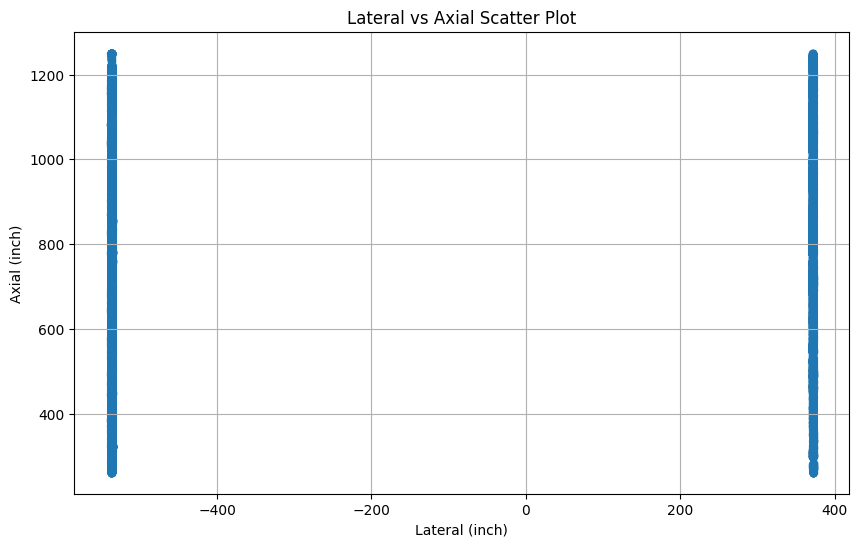

In [124]:
scatter = df.plot.scatter(x='lateral_inch', y='axial_inch', alpha=0.1, figsize=(10, 6))
plt.title('Lateral vs Axial Scatter Plot')
plt.xlabel('Lateral (inch)')
plt.ylabel('Axial (inch)')
plt.grid(True)
plt.show()


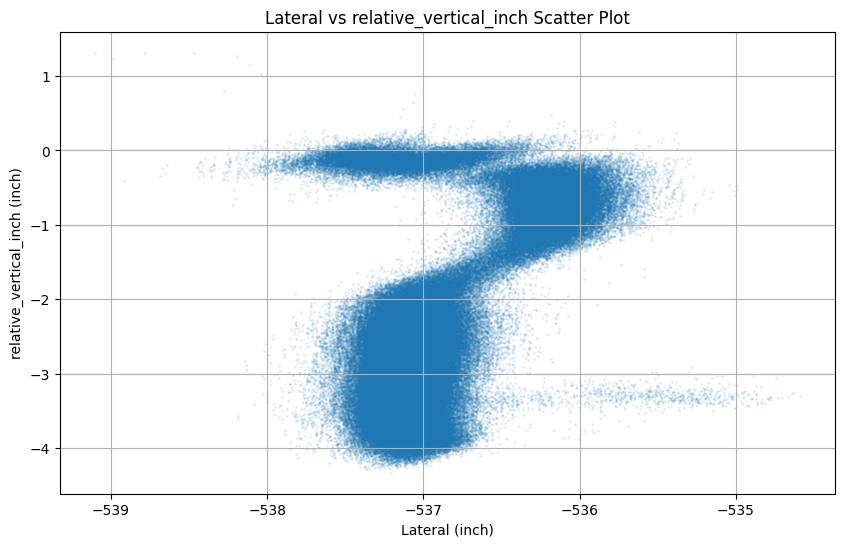

In [163]:
scatter = df[df['is_rail_a']==1].plot.scatter(x='lateral_inch', y='relative_vertical_inch', alpha=0.1, s=1, figsize=(10, 6))
plt.title('Lateral vs relative_vertical_inch Scatter Plot')
plt.xlabel('Lateral (inch)')
plt.ylabel('relative_vertical_inch (inch)')
plt.grid(True)
plt.show()

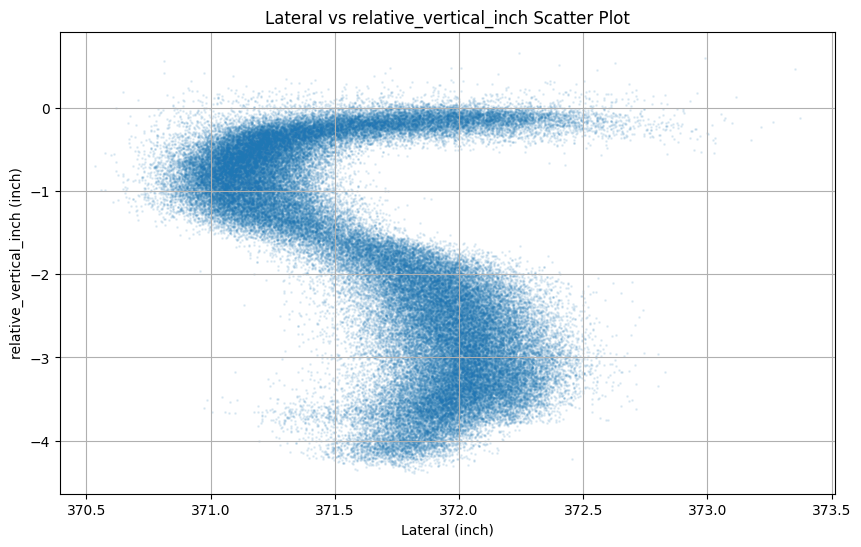

In [162]:
scatter = df[df['is_rail_b']==1].plot.scatter(x='lateral_inch', y='relative_vertical_inch', alpha=0.1, s=1, figsize=(10, 6))
plt.title('Lateral vs relative_vertical_inch Scatter Plot')
plt.xlabel('Lateral (inch)')
plt.ylabel('relative_vertical_inch (inch)')
plt.grid(True)
plt.show()

In [127]:
# GOAL
'''
is_rail_a
is_rail_b
is_web
is_head_top
is_head_side
is_noise
'''

'\nis_rail_a\nis_rail_b\nis_web\nis_head_top\nis_head_side\nis_noise\n'

In [128]:
df.describe()

Intensity  Original_cloud_index        lateral          axial  \
count  313969.000000         313969.000000  313969.000000  313969.000000   
mean        7.813392              1.499865     -22.607316      63.388140   
std         5.914566              1.163861      34.434999      23.449905   
min         0.000000              0.000000     -44.925005      21.685846   
25%         3.000000              0.000000     -44.758997      42.947312   
50%         6.000000              2.000000     -44.726147      64.945389   
75%        11.000000              2.000000      30.929421      85.643727   
max        72.000000              4.000000      31.114301     104.305951   

            vertical   lateral_inch     axial_inch  vertical_inch  \
count  313969.000000  313969.000000  313969.000000  313969.000000   
mean        0.331165    -271.287789     760.657680       3.973982   
std         0.124794     413.219992     281.398855       1.497531   
min         0.000000    -539.100056     260.230147       0.000000   
25%         0.250460    -537.107966     515.367739       3.005524   
50%         0.321208    -536.713768     779.344666       3.854501   
75%         0.430732     371.153047    1027.724720       5.168779   
max         0.654076     373.371617    1251.671411       7.848909   

       lateral_inch_round  axial_inch_round  ...            Nz            PCV  \
count       313969.000000     313969.000000  ...  3.139690e+05  313969.000000   
mean          -271.287845        760.657704  ...  2.847640e-01       0.744413   
std            413.220033        281.398891  ...  2.950865e-01       0.114600   
min           -539.125000        260.250000  ...  4.123432e-07       0.355469   
25%           -537.125000        515.375000  ...  5.757341e-02       0.652344   
50%           -536.687500        779.375000  ...  1.590475e-01       0.722656   
75%            371.125000       1027.750000  ...  4.383720e-01       0.828125   
max            373.375000       1251.687500  ...  9.999997e-01       1.000000   

          curvature  roughness_mean_abs  roughness_rms  roughness_std  \
count  3.139690e+05       313969.000000  313969.000000  313969.000000   
mean   5.387361e-02            0.493392       0.590553       0.317151   
std    2.536017e-02            0.275278       0.289180       0.112159   
min   -1.317334e-16            0.158846       0.204998       0.117290   
25%    3.628867e-02            0.311182       0.400009       0.243958   
50%    4.830541e-02            0.370106       0.462778       0.274332   
75%    6.587028e-02            0.565189       0.659016       0.357292   
max    2.856029e-01            3.397723       3.678154       1.658477   

                 DIP         DIPDIR        NORMDIP     NORMDIPDIR  
count  313969.000000  313969.000000  313969.000000  313969.000000  
mean       71.161215     177.122078      71.161215     177.122078  
std        22.481930     114.226868      22.481930     114.226868  
min         0.044541       0.000012       0.044541       0.000012  
25%        63.999943     174.779194      63.999943     174.779194  
50%        80.848388     180.040967      80.848388     180.040967  
75%        86.699462     184.574033      86.699462     184.574033  
max        89.999976     359.999595      89.999976     359.999595  

[8 rows x 51 columns]

In [129]:
df.columns


Index(['Intensity', 'Original_cloud_index', 'lateral', 'axial', 'vertical',
       'lateral_inch', 'axial_inch', 'vertical_inch', 'lateral_inch_round',
       'axial_inch_round', 'vertical_inch_round', 'is_rail_a', 'is_rail_b',
       'relative_vertical_inch', 'lam1', 'lam2', 'lam3', 'e1x', 'e1y', 'e1z',
       'e2x', 'e2y', 'e2z', 'e3x', 'e3y', 'e3z', 'eigen_sum', 'omnivariance',
       'eigenentropy', 'anisotropy', 'planarity', 'linearity',
       'surface_variation', 'sphericity', 'pca1', 'pca2', 'verticality', 'O',
       'neighbors', 'Nx', 'Ny', 'Nz', 'PCV', 'curvature', 'roughness_mean_abs',
       'roughness_rms', 'roughness_std', 'DIP', 'DIPDIR', 'NORMDIP',
       'NORMDIPDIR'],
      dtype='object')

In [130]:

MODEL_PATH = "rf_classification_ideal_rail.joblib"
META_PATH = "rf_classification_ideal_rail_metadata.json"

# 1) Load model and metadata
pipeline = joblib.load(MODEL_PATH)
with open(META_PATH, "r") as f:
    features = json.load(f)["features"]

# 2) Prepare data
df_new = df.copy()
for col in features:
    if col not in df_new:
        df_new[col] = np.nan
X_new = df_new[features].apply(pd.to_numeric, errors='coerce')

# 3) Predict
df_new["RF_Prediction"] = pipeline.predict(X_new)

# Optional: add probabilities if available
rf = pipeline.named_steps.get("rf")
if hasattr(rf, "predict_proba"):
    proba = pipeline.predict_proba(X_new)
    df_new["RF_ProbMax"] = proba.max(axis=1)
    classes = rf.classes_
    idx = df_new["RF_Prediction"].map({c: i for i, c in enumerate(classes)}).to_numpy()
    df_new["RF_Pred_Prob"] = proba[np.arange(len(df_new)), idx]

print("Predictions added: RF_Prediction (+ probabilities if available)")


Predictions added: RF_Prediction (+ probabilities if available)


In [164]:
df_new.describe()

Intensity  Original_cloud_index        lateral          axial  \
count  313969.000000         313969.000000  313969.000000  313969.000000   
mean        7.813392              1.499865     -22.607316      63.388140   
std         5.914566              1.163861      34.434999      23.449905   
min         0.000000              0.000000     -44.925005      21.685846   
25%         3.000000              0.000000     -44.758997      42.947312   
50%         6.000000              2.000000     -44.726147      64.945389   
75%        11.000000              2.000000      30.929421      85.643727   
max        72.000000              4.000000      31.114301     104.305951   

            vertical   lateral_inch     axial_inch  vertical_inch  \
count  313969.000000  313969.000000  313969.000000  313969.000000   
mean        0.331165    -271.287789     760.657680       3.973982   
std         0.124794     413.219992     281.398855       1.497531   
min         0.000000    -539.100056     260.230147       0.000000   
25%         0.250460    -537.107966     515.367739       3.005524   
50%         0.321208    -536.713768     779.344666       3.854501   
75%         0.430732     371.153047    1027.724720       5.168779   
max         0.654076     373.371617    1251.671411       7.848909   

       lateral_inch_round  axial_inch_round  ...  roughness_mean_abs  \
count       313969.000000     313969.000000  ...       313969.000000   
mean          -271.287845        760.657704  ...            0.493392   
std            413.220033        281.398891  ...            0.275278   
min           -539.125000        260.250000  ...            0.158846   
25%           -537.125000        515.375000  ...            0.311182   
50%           -536.687500        779.375000  ...            0.370106   
75%            371.125000       1027.750000  ...            0.565189   
max            373.375000       1251.687500  ...            3.397723   

       roughness_rms  roughness_std            DIP         DIPDIR  \
count  313969.000000  313969.000000  313969.000000  313969.000000   
mean        0.590553       0.317151      71.161215     177.122078   
std         0.289180       0.112159      22.481930     114.226868   
min         0.204998       0.117290       0.044541       0.000012   
25%         0.400009       0.243958      63.999943     174.779194   
50%         0.462778       0.274332      80.848388     180.040967   
75%         0.659016       0.357292      86.699462     184.574033   
max         3.678154       1.658477      89.999976     359.999595   

             NORMDIP     NORMDIPDIR  RF_Prediction     RF_ProbMax  \
count  313969.000000  313969.000000  313969.000000  313969.000000   
mean       71.161215     177.122078       3.016629       0.634909   
std        22.481930     114.226868       0.690512       0.205970   
min         0.044541       0.000012       1.000000       0.323333   
25%        63.999943     174.779194       3.000000       0.456667   
50%        80.848388     180.040967       3.000000       0.563333   
75%        86.699462     184.574033       3.000000       0.880000   
max        89.999976     359.999595       4.000000       0.926667   

        RF_Pred_Prob  
count  313969.000000  
mean        0.634909  
std         0.205970  
min         0.323333  
25%         0.456667  
50%         0.563333  
75%         0.880000  
max         0.926667  

[8 rows x 54 columns]

In [132]:
dfa_new = df_new[df_new['is_rail_a'] == 1].copy()
dfb_new = df_new[df_new['is_rail_b'] == 1].copy()

In [133]:
dfa_new_filtered = dfa_new[(dfa_new['RF_Prediction'] != 4)].copy()
dfb_new_filtered = dfb_new[(dfb_new['RF_Prediction'] != 4)].copy()

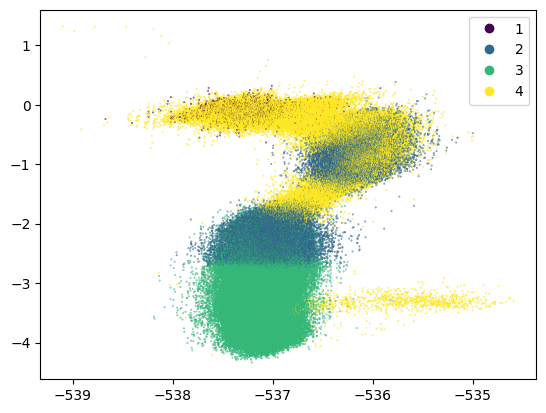

In [134]:
scatter = plt.scatter(dfa_new['lateral_inch'], dfa_new['relative_vertical_inch'], c=dfa_new['RF_Prediction'], s=0.1)
plt.legend(*scatter.legend_elements())

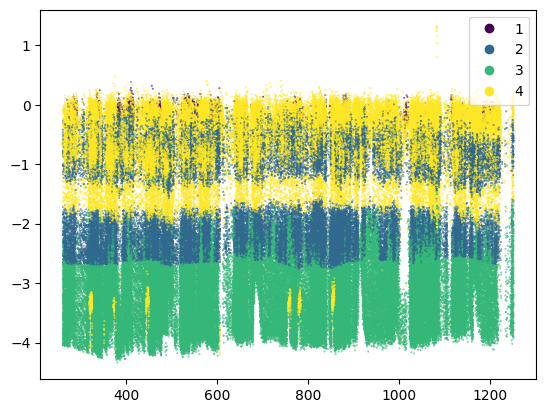

In [135]:
scatter = plt.scatter(dfa_new['axial_inch'], dfa_new['relative_vertical_inch'], c=dfa_new['RF_Prediction'], s=0.1)
plt.legend(*scatter.legend_elements())

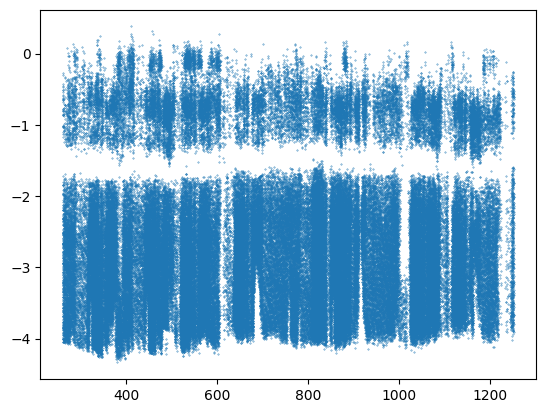

In [136]:
scatter = plt.scatter(dfa_new_filtered['axial_inch'], dfa_new_filtered['relative_vertical_inch'], s=0.1)

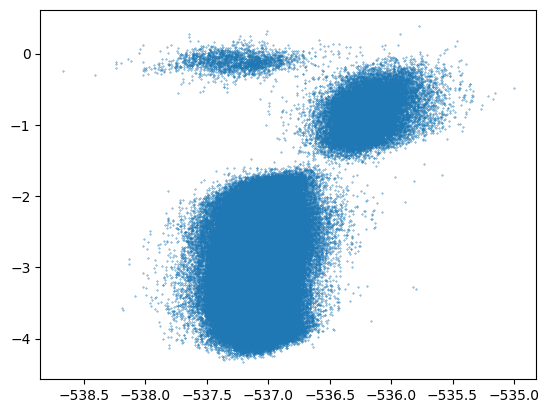

In [137]:
scatter = plt.scatter(dfa_new_filtered['lateral_inch'], dfa_new_filtered['relative_vertical_inch'], s=0.1)

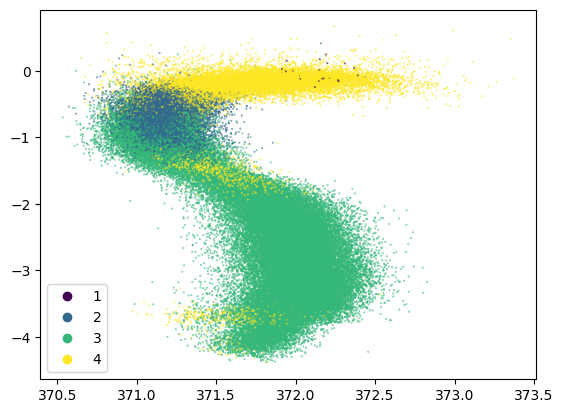

In [138]:
scatter = plt.scatter(dfb_new['lateral_inch'], dfb_new['relative_vertical_inch'], c=dfb_new['RF_Prediction'], s=0.1)
plt.legend(*scatter.legend_elements())

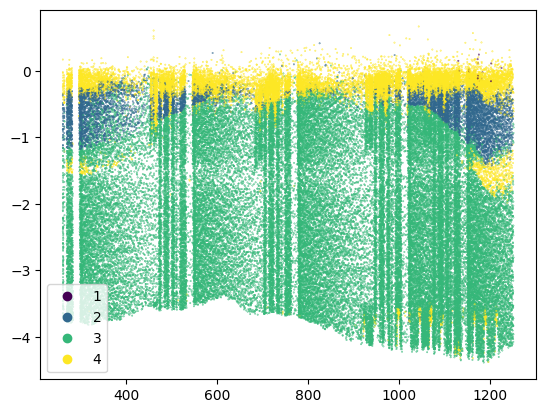

In [139]:
scatter = plt.scatter(dfb_new['axial_inch'], dfb_new['relative_vertical_inch'], c=dfb_new['RF_Prediction'], s=0.1)
plt.legend(*scatter.legend_elements())

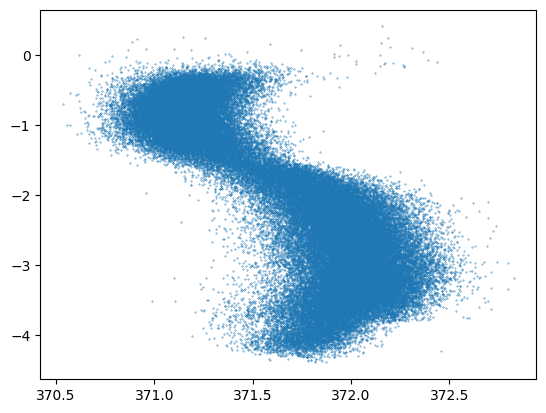

In [140]:
scatter = plt.scatter(dfb_new_filtered['lateral_inch'], dfb_new_filtered['relative_vertical_inch'], s=0.1)

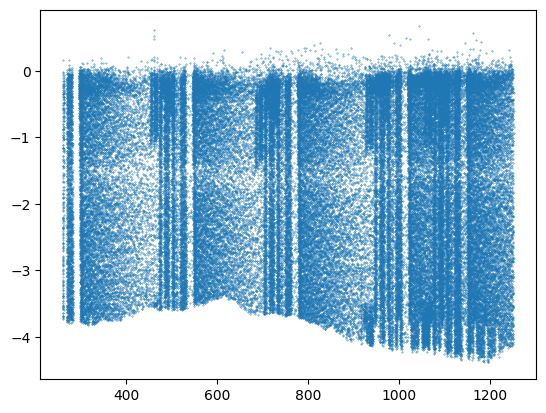

In [141]:
scatter = plt.scatter(dfb_new['axial_inch'], dfb_new['relative_vertical_inch'], s=0.1)

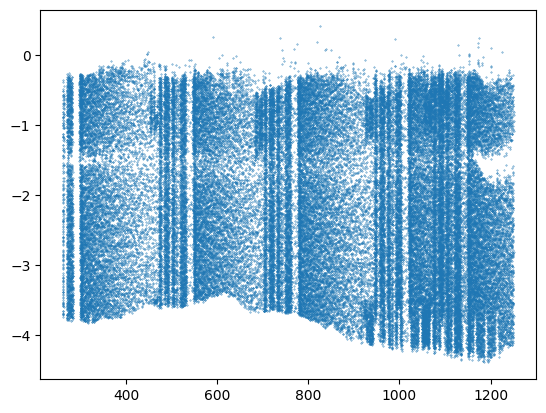

In [142]:
scatter = plt.scatter(dfb_new_filtered['axial_inch'], dfb_new_filtered['relative_vertical_inch'], s=0.1)

In [143]:
# Unsupervised Learning Models — Setup

# --- data source ---
df_in = dfb_new_filtered.copy()

feature_cols = ['lateral_inch', 'vertical_inch']  
random_state = 42
plot_sample_n = 50_000
silhouette_sample_n = 50_000

# --- numeric prep: impute + scale ---
X_raw = df_in[feature_cols].apply(pd.to_numeric, errors='coerce').to_numpy()
imputer = SimpleImputer(strategy='median')
X_num = imputer.fit_transform(X_raw)
scaler = StandardScaler()
X = scaler.fit_transform(X_num)

# --- helpers ---
def sample_idx(n, cap, seed=random_state):
    if n <= cap:
        return np.arange(n)
    rng = np.random.default_rng(seed)
    return rng.choice(n, size=cap, replace=False)

def safe_silhouette(X_arr, labels, sample_cap=silhouette_sample_n, ignore_label=-1):
    lbl = np.asarray(labels)
    if ignore_label is not None:
        mask = lbl != ignore_label
    else:
        mask = np.ones(len(lbl), dtype=bool)
    if mask.sum() < 3:
        return np.nan
    uniq = np.unique(lbl[mask])
    if len(uniq) < 2:
        return np.nan
    idx = sample_idx(mask.sum(), sample_cap)
    return float(silhouette_score(X_arr[mask][idx], lbl[mask][idx]))

# --- baseline --- 
df_base = df_in.copy()
X_base = X
print(f"Setup complete: X shape = {X.shape}, using features: {feature_cols}")

Setup complete: X shape = (74553, 2), using features: ['lateral_inch', 'vertical_inch']


In [144]:
def quick_scatter(dfp, col, title):
    idx = sample_idx(len(dfp), plot_sample_n)
    d = dfp.iloc[idx]
    labels = d[col].to_numpy()

    cmap = plt.get_cmap('tab10')
    unique = np.unique(labels[~pd.isna(labels)])  # non-NaN unique labels

    # Color map: clusters use tab10, -1 is "noise" gray, anything else defaults darker gray
    colors = {l: cmap(int(l) % 10) for l in unique if l != -1}
    colors[-1] = (0.6, 0.6, 0.6, 0.6)  # noise
    default_unlabeled = (0.2, 0.2, 0.2, 0.4)  # unlabeled (NaN) + any unexpected labels
    c = [colors.get(l, default_unlabeled) for l in labels]

    plt.figure(figsize=(6, 6))
    plt.scatter(d['lateral_inch'], d['vertical_inch'], s=1, c=c, alpha=0.2)
    plt.title(title)
    plt.xlabel('lateral_inch')
    plt.ylabel('vertical_inch')

    # --- Legend ---
    from matplotlib.lines import Line2D
    # Sort numeric labels if possible (excluding -1 which we add as "noise")
    try:
        cluster_labs = sorted([l for l in unique if l != -1])
    except Exception:
        cluster_labs = [l for l in unique if l != -1]

    handles = [
        Line2D([0], [0], marker='o', linestyle='None', markersize=6,
               markerfacecolor=colors[l], markeredgecolor='none',
               label=f'cluster {int(l)}')
        for l in cluster_labs
    ]

    # Add noise (-1) if present
    if np.any(labels == -1):
        handles.append(
            Line2D([0], [0], marker='o', linestyle='None', markersize=6,
                   markerfacecolor=colors[-1], markeredgecolor='none',
                   label='noise')
        )

    # Add unlabeled (NaN) if present
    if pd.isna(labels).any():
        handles.append(
            Line2D([0], [0], marker='o', linestyle='None', markersize=6,
                   markerfacecolor=default_unlabeled, markeredgecolor='none',
                   label='unlabeled')
        )

    if handles:
        plt.legend(handles=handles, loc='best', frameon=False)

    plt.tight_layout()
    plt.show()


In [145]:
# Cell 2 — DBSCAN clustering

min_samples_dbscan = 20
quantile_for_eps = 0.98

def suggest_eps(X_arr, k=min_samples_dbscan, q=quantile_for_eps):
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X_arr)
    dists, _ = nn.kneighbors(X_arr)
    kth = np.sort(dists[:, -1])
    return float(np.quantile(kth, q))

eps = suggest_eps(X, min_samples_dbscan, quantile_for_eps)
dbscan = DBSCAN(eps=eps, min_samples=min_samples_dbscan, n_jobs=-1)
labels_db = dbscan.fit_predict(X)

df_in['CL_DBSCAN'] = labels_db
sil_db = safe_silhouette(X, labels_db, ignore_label=-1)
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise = int((labels_db == -1).sum())
print(f"[DBSCAN] eps≈{eps:.3f}, min_samples={min_samples_dbscan}, clusters={n_clusters}, noise={n_noise}, silhouette={sil_db:.3f}")

[DBSCAN] eps≈0.081, min_samples=20, clusters=1, noise=807, silhouette=nan


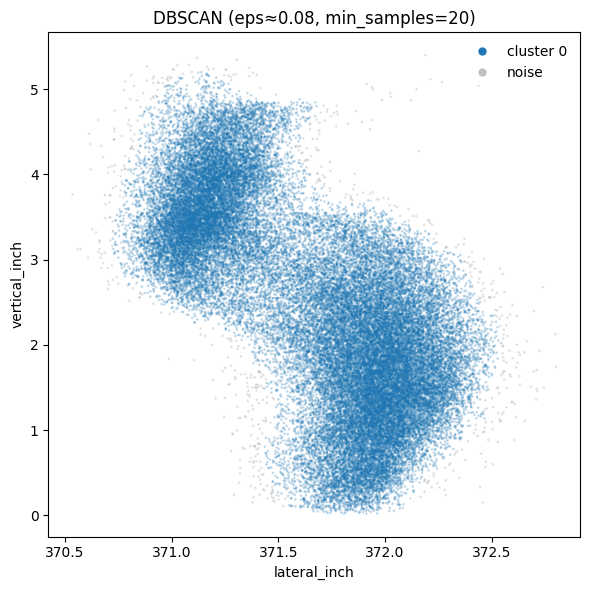

In [146]:
quick_scatter(df_in, 'CL_DBSCAN', f"DBSCAN (eps≈{eps:.2f}, min_samples={min_samples_dbscan})")

In [147]:
df_in.describe()

Intensity  Original_cloud_index       lateral         axial  \
count  74553.000000          74553.000000  74553.000000  74553.000000   
mean      10.266093              2.071238     30.972095     68.207652   
std        5.690601              1.363926      0.034580     24.023416   
min        0.000000              0.000000     30.877926     21.685846   
25%        6.000000              1.000000     30.938544     47.318144   
50%        9.000000              2.000000     30.980997     70.567330   
75%       13.000000              3.000000     30.999989     89.812591   
max       72.000000              4.000000     31.068961    104.241334   

           vertical  lateral_inch    axial_inch  vertical_inch  \
count  74553.000000  74553.000000  74553.000000   74553.000000   
mean       0.202281    371.665137    818.491818       2.427372   
std        0.097516      0.414964    288.280994       1.170195   
min        0.000000    370.535111    260.230147       0.000000   
25%        0.123434    371.262532    567.817725       1.481213   
50%        0.199170    371.771960    846.807965       2.390043   
75%        0.280567    371.999865   1077.751097       3.366799   
max        0.466313    372.827534   1250.896006       5.595759   

       lateral_inch_round  axial_inch_round  ...  roughness_rms  \
count        74553.000000      74553.000000  ...   74553.000000   
mean           371.665172        818.491863  ...       0.518538   
std              0.415447        288.281079  ...       0.181031   
min            370.562500        260.250000  ...       0.204998   
25%            371.250000        567.812500  ...       0.382294   
50%            371.750000        846.812500  ...       0.474021   
75%            372.000000       1077.750000  ...       0.615287   
max            372.812500       1250.875000  ...       3.678154   

       roughness_std           DIP        DIPDIR       NORMDIP    NORMDIPDIR  \
count   74553.000000  74553.000000  74553.000000  74553.000000  74553.000000   
mean        0.275978     75.000388    171.835918     75.000388    171.835918   
std         0.077581     10.154950    133.045116     10.154950    133.045116   
min         0.125684      6.718432      0.000131      6.718432      0.000131   
25%         0.216863     67.288696      5.142642     67.288696      5.142642   
50%         0.263083     76.592132    179.821184     76.592132    179.821184   
75%         0.321168     83.579216    351.863769     83.579216    351.863769   
max         1.408649     89.999448    359.999595     89.999448    359.999595   

       RF_Prediction    RF_ProbMax  RF_Pred_Prob     CL_DBSCAN  
count   74553.000000  74553.000000  74553.000000  74553.000000  
mean        2.887436      0.768913      0.768913     -0.010825  
std         0.317036      0.164001      0.164001      0.103477  
min         1.000000      0.333333      0.333333     -1.000000  
25%         3.000000      0.630000      0.630000      0.000000  
50%         3.000000      0.850000      0.850000      0.000000  
75%         3.000000      0.893333      0.893333      0.000000  
max         3.000000      0.923333      0.923333      0.000000  

[8 rows x 55 columns]

In [148]:
# --- use DBSCAN to denoise for subsequent methods ---
'''
use_denoised_for_next = True  # set False to keep all points downstream
if use_denoised_for_next:
    keep = labels_db != -1
    df_base = df_in.loc[keep].copy()
    X_base = X[keep]
    kept_ratio = keep.sum() / len(df_in)
    print(f"Using denoised base for next methods: kept {keep.sum()} / {len(df_in)} ({kept_ratio:.1%}) points")
else:
    df_base = df_in.copy()
    X_base = X
    '''

'\nuse_denoised_for_next = True  # set False to keep all points downstream\nif use_denoised_for_next:\n    keep = labels_db != -1\n    df_base = df_in.loc[keep].copy()\n    X_base = X[keep]\n    kept_ratio = keep.sum() / len(df_in)\n    print(f"Using denoised base for next methods: kept {keep.sum()} / {len(df_in)} ({kept_ratio:.1%}) points")\nelse:\n    df_base = df_in.copy()\n    X_base = X\n    '

In [149]:
'''
# Simple Isolation Forest Denoising

# Config
contamination = 0.02  # expected outlier fraction
random_state = 42

# Scale features (recommended)
Xs = StandardScaler().fit_transform(X)

# Fit Isolation Forest
iso = IsolationForest(contamination=contamination, random_state=random_state, n_jobs=-1)
keep = iso.fit_predict(Xs) == 1  # True = inlier

# Subset for next steps
df_base = df_in.loc[keep].copy()
X_base = X[keep]

print(f"[IsolationForest] kept {keep.sum()} / {len(keep)} ({keep.mean():.1%})")

# visualize kept vs dropped
tmp = df_in.copy()
tmp['_mask'] = np.where(keep, 0, -1)
quick_scatter(tmp, '_mask', f"Denoise (IsolationForest)")
'''

'\n# Simple Isolation Forest Denoising\n\n# Config\ncontamination = 0.02  # expected outlier fraction\nrandom_state = 42\n\n# Scale features (recommended)\nXs = StandardScaler().fit_transform(X)\n\n# Fit Isolation Forest\niso = IsolationForest(contamination=contamination, random_state=random_state, n_jobs=-1)\nkeep = iso.fit_predict(Xs) == 1  # True = inlier\n\n# Subset for next steps\ndf_base = df_in.loc[keep].copy()\nX_base = X[keep]\n\nprint(f"[IsolationForest] kept {keep.sum()} / {len(keep)} ({keep.mean():.1%})")\n\n# visualize kept vs dropped\ntmp = df_in.copy()\ntmp[\'_mask\'] = np.where(keep, 0, -1)\nquick_scatter(tmp, \'_mask\', f"Denoise (IsolationForest)")\n'

In [150]:
'''

# Assume `keep` is a boolean mask from your denoising step
colors = np.where(keep, 'blue', 'red')  # blue = kept, red = dropped

plt.figure(figsize=(7, 7))
plt.scatter(df_in['axial_inch'], df_in['vertical_inch'], s=1, c=colors, alpha=0.1)
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.title('Axial vs Vertical (Kept vs Dropped)')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Kept', markerfacecolor='blue', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Dropped', markerfacecolor='red', markersize=6)
], loc='best', frameon=False)
plt.tight_layout()
plt.show()
'''

"\n\n# Assume `keep` is a boolean mask from your denoising step\ncolors = np.where(keep, 'blue', 'red')  # blue = kept, red = dropped\n\nplt.figure(figsize=(7, 7))\nplt.scatter(df_in['axial_inch'], df_in['vertical_inch'], s=1, c=colors, alpha=0.1)\nplt.xlabel('axial_inch')\nplt.ylabel('vertical_inch')\nplt.title('Axial vs Vertical (Kept vs Dropped)')\nplt.legend(handles=[\n    plt.Line2D([0], [0], marker='o', color='w', label='Kept', markerfacecolor='blue', markersize=6),\n    plt.Line2D([0], [0], marker='o', color='w', label='Dropped', markerfacecolor='red', markersize=6)\n], loc='best', frameon=False)\nplt.tight_layout()\nplt.show()\n"

In [151]:
# Cell 3 — Agglomerative (Ward) with memory-safe options

k_for_methods = 3

# Always downcast to float32 to halve memory
Xb = X_base.astype(np.float32, copy=False)

# Uses a sparse k-NN graph to limit merges (massive memory/time reduction)
try:
    n_neighbors_graph = 20  # 10–30 typical; larger -> smoother clusters but more memory
    connectivity = kneighbors_graph(
        Xb, n_neighbors=n_neighbors_graph, include_self=False,
        mode='distance', n_jobs=-1
    )
    connectivity = connectivity.astype(np.float32)

    ward = AgglomerativeClustering(
        n_clusters=k_for_methods,
        linkage='ward',
        connectivity=connectivity,
        compute_full_tree='auto' 
    )
    labels_ward = ward.fit_predict(Xb)

    df_base['CL_WARD'] = labels_ward
    df_in['CL_WARD'] = np.nan
    df_in.loc[df_base.index, 'CL_WARD'] = labels_ward

    sil_ward = safe_silhouette(Xb, labels_ward)
    print(f"[Ward+connectivity] k={k_for_methods}, nn={n_neighbors_graph}, silhouette={sil_ward:.3f}")

except MemoryError:
    print("MemoryError on connectivity-constrained Ward. Falling back to two-stage approach...")
    labels_ward = None
except Exception as e:
    print("Ward with connectivity failed:", e)
    labels_ward = None



[Ward+connectivity] k=3, nn=20, silhouette=0.421


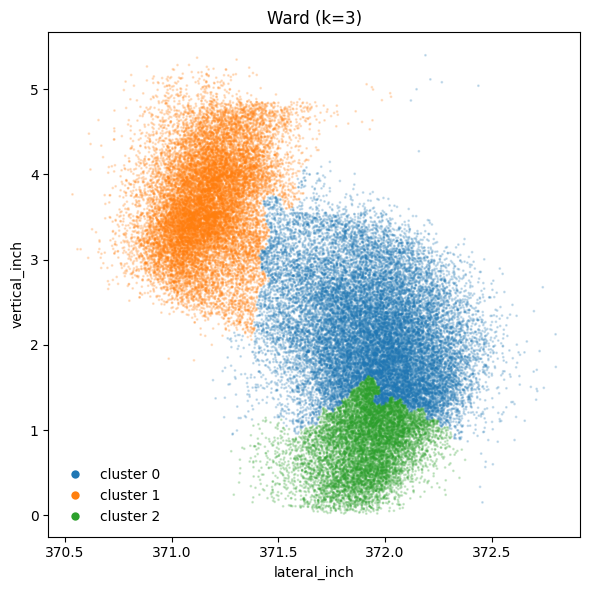

In [152]:
quick_scatter(df_in, 'CL_WARD', f"Ward (k={k_for_methods})")

# Cell 4 — Spectral Clustering

n_neighbors_graph = 20
n2 = X_base.shape[0]
nn = min(n_neighbors_graph, max(5, n2 - 1))

spectral = SpectralClustering(
    n_clusters=k_for_methods,
    affinity='nearest_neighbors',
    n_neighbors=nn,
    assign_labels='kmeans',
    random_state=42,
    n_init=10
)
labels_spec = spectral.fit_predict(X_base)

df_base['CL_SPECTRAL'] = labels_spec
df_in['CL_SPECTRAL'] = np.nan
df_in.loc[df_base.index, 'CL_SPECTRAL'] = labels_spec

sil_spec = safe_silhouette(X_base, labels_spec, ignore_label=None)
print(f"[Spectral] clusters={len(np.unique(labels_spec))}, silhouette={sil_spec:.3f} (nn={nn})")


In [153]:
# Cell 4 — Spectral Clustering
'''
n_neighbors_graph = 20
n2 = X_base.shape[0]
nn = min(n_neighbors_graph, max(5, n2 - 1))

spectral = SpectralClustering(
    n_clusters=k_for_methods,
    affinity='nearest_neighbors',
    n_neighbors=nn,
    assign_labels='kmeans',
    random_state=42,
    n_init=10
)
labels_spec = spectral.fit_predict(X_base)

df_base['CL_SPECTRAL'] = labels_spec
df_in['CL_SPECTRAL'] = np.nan
df_in.loc[df_base.index, 'CL_SPECTRAL'] = labels_spec

sil_spec = safe_silhouette(X_base, labels_spec, ignore_label=None)
print(f"[Spectral] clusters={len(np.unique(labels_spec))}, silhouette={sil_spec:.3f} (nn={nn})")
'''

'\nn_neighbors_graph = 20\nn2 = X_base.shape[0]\nnn = min(n_neighbors_graph, max(5, n2 - 1))\n\nspectral = SpectralClustering(\n    n_clusters=k_for_methods,\n    affinity=\'nearest_neighbors\',\n    n_neighbors=nn,\n    assign_labels=\'kmeans\',\n    random_state=42,\n    n_init=10\n)\nlabels_spec = spectral.fit_predict(X_base)\n\ndf_base[\'CL_SPECTRAL\'] = labels_spec\ndf_in[\'CL_SPECTRAL\'] = np.nan\ndf_in.loc[df_base.index, \'CL_SPECTRAL\'] = labels_spec\n\nsil_spec = safe_silhouette(X_base, labels_spec, ignore_label=None)\nprint(f"[Spectral] clusters={len(np.unique(labels_spec))}, silhouette={sil_spec:.3f} (nn={nn})")\n'

In [154]:
#quick_scatter(df_in, 'CL_SPECTRAL', f"Spectral (k={k_for_methods}, nn={nn})")

In [155]:
# Spectral Clustering (two-stage: micro-centers -> spectral -> propagate)

# Config
k_for_methods = 3
micro_k = 1000
n_neighbors_graph = 20
affinity_mode = 'nearest_neighbors'
propagate_via_knn = False
knn_neighbors = 7
random_state = 42

Xb = X_base.astype(np.float32, copy=False)

# Stage 1: Micro-clusters
mbk = MiniBatchKMeans(n_clusters=min(micro_k, len(Xb)), batch_size=4096,
                      random_state=random_state, n_init='auto')
micro_labels = mbk.fit_predict(Xb)
centers = mbk.cluster_centers_.astype(np.float32)
m = centers.shape[0]
print(f"[Spectral-2stage] micro centers: {m}")

# Stage 2: Spectral on centers
if affinity_mode == 'nearest_neighbors':
    nn = min(n_neighbors_graph, max(5, m - 1))
    spectral = SpectralClustering(n_clusters=k_for_methods, affinity='nearest_neighbors',
                                   n_neighbors=nn, assign_labels='kmeans',
                                   random_state=random_state, n_init=10)
elif affinity_mode == 'rbf':
    from sklearn.metrics.pairwise import pairwise_distances
    sample = np.random.default_rng(42).choice(m, min(m, 3000), replace=False)
    dists = pairwise_distances(centers[sample], centers[sample])
    med = np.median(dists[np.triu_indices_from(dists, 1)])
    gamma = 1.0 / (2.0 * (med ** 2) + 1e-12)
    spectral = SpectralClustering(n_clusters=k_for_methods, affinity='rbf', gamma=gamma,
                                   assign_labels='kmeans', random_state=random_state, n_init=10)

center_labels = spectral.fit_predict(centers)

# Stage 3: Propagate labels
if propagate_via_knn:
    knn = KNeighborsClassifier(n_neighbors=knn_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, center_labels)
    labels_spec = knn.predict(Xb)
else:
    labels_spec = pd.Series(center_labels).iloc[micro_labels].to_numpy()

# Store results
df_base['CL_SPECTRAL'] = labels_spec
df_in['CL_SPECTRAL'] = np.nan
df_in.loc[df_base.index, 'CL_SPECTRAL'] = labels_spec

# Score & quick scatter
sil_spec = safe_silhouette(Xb, labels_spec)
print(f"[Spectral-2stage] silhouette={sil_spec:.3f}")


del centers, micro_labels, center_labels
gc.collect()


[Spectral-2stage] micro centers: 1000
[Spectral-2stage] silhouette=0.453


3407

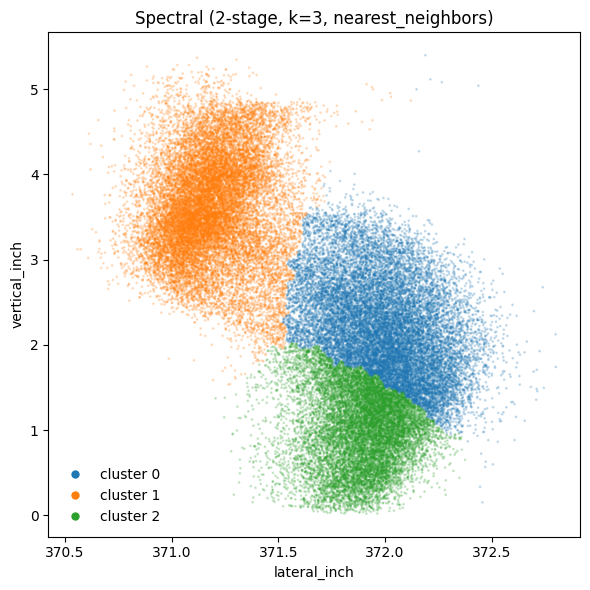

In [156]:
quick_scatter(df_in, 'CL_SPECTRAL', f"Spectral (2-stage, k={k_for_methods}, {affinity_mode})")

In [157]:

# Cell 5 — Gaussian Mixture (GMM)
gmm = GaussianMixture(
    n_components=k_for_methods,
    covariance_type='full',
    random_state=42,
    n_init=5
)
labels_gmm = gmm.fit_predict(X_base)

df_base['CL_GMM3'] = labels_gmm
df_in['CL_GMM3'] = np.nan
df_in.loc[df_base.index, 'CL_GMM3'] = labels_gmm

sil_gmm = safe_silhouette(X_base, labels_gmm, ignore_label=None)
print(f"[GMM-3] clusters={len(np.unique(labels_gmm))}, silhouette={sil_gmm:.3f}")

print("Cluster counts (GMM):")
print(df_in['CL_GMM3'].value_counts(dropna=False).sort_index())


[GMM-3] clusters=3, silhouette=0.450
Cluster counts (GMM):
CL_GMM3
0.0    24886
1.0    26304
2.0    23363
Name: count, dtype: int64


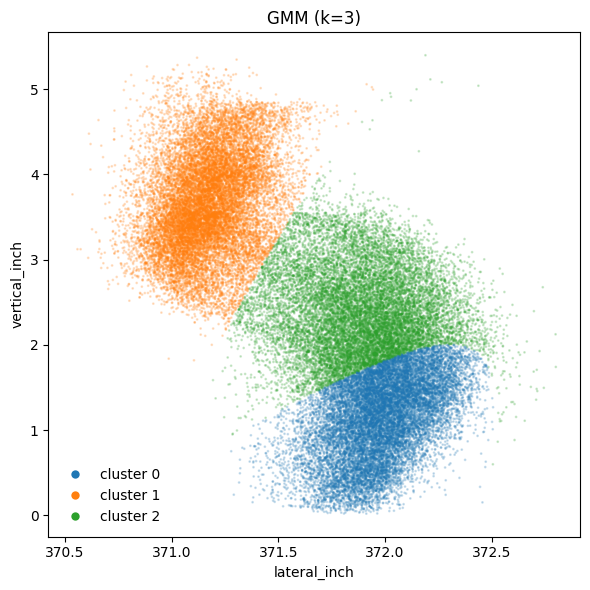

In [158]:
quick_scatter(df_in, 'CL_GMM3', f"GMM (k={k_for_methods})")

In [159]:
# Cell 6 — KMeans
kmeans = KMeans(n_clusters=k_for_methods, random_state=42, n_init='auto')
labels_km = kmeans.fit_predict(X_base)

df_base['CL_KMEANS3'] = labels_km
df_in['CL_KMEANS3'] = np.nan
df_in.loc[df_base.index, 'CL_KMEANS3'] = labels_km

sil_km = safe_silhouette(X_base, labels_km, ignore_label=None)
print(f"[KMeans-3] clusters={len(np.unique(labels_km))}, silhouette={sil_km:.3f}")


[KMeans-3] clusters=3, silhouette=0.458


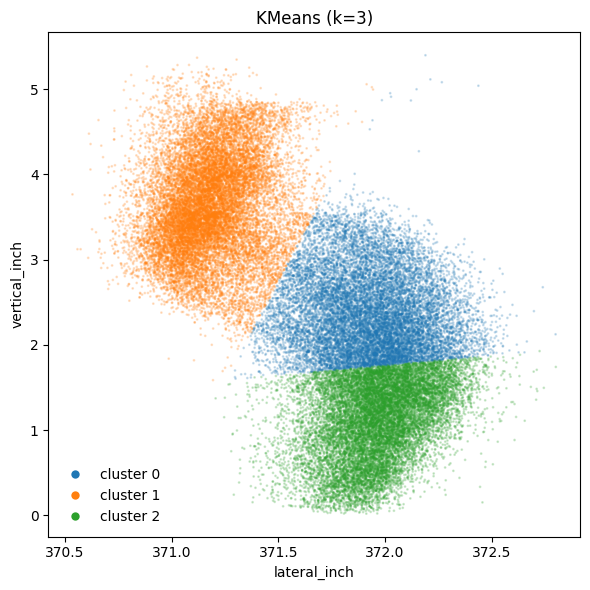

In [160]:
quick_scatter(df_in, 'CL_KMEANS3', "KMeans (k=3)")

In [161]:
# Cell 7 — Summary counts per label for each method
def cluster_counts(s):
    return pd.Series(s).value_counts(dropna=False).sort_index()

print("DBSCAN:\n",  cluster_counts(df_in['CL_DBSCAN']))
print("\nWard:\n",    cluster_counts(df_in['CL_WARD']))
print("\nSpectral:\n", cluster_counts(df_in['CL_SPECTRAL']))
print("\nGMM-3:\n",  cluster_counts(df_in['CL_GMM3']))
print("\nKMeans-3:\n", cluster_counts(df_in['CL_KMEANS3']))

DBSCAN:
 CL_DBSCAN
-1      807
 0    73746
Name: count, dtype: int64

Ward:
 CL_WARD
0.0    33162
1.0    26232
2.0    15159
Name: count, dtype: int64

Spectral:
 CL_SPECTRAL
0.0    26491
1.0    28285
2.0    19777
Name: count, dtype: int64

GMM-3:
 CL_GMM3
0.0    24886
1.0    26304
2.0    23363
Name: count, dtype: int64

KMeans-3:
 CL_KMEANS3
0.0    22332
1.0    27590
2.0    24631
Name: count, dtype: int64
